#Is it more important to have a big budget for a film production or a great film director?

Have you ever stopped to think about what makes a movie successful? Many might think that the key lies in having a talented director who has previously been involved in another great success, while others would say it's having a huge budget for top-notch visual effects.



*   The following company wants to conduct an analysis to determine how they should better allocate their resources, whether they should invest more in visual budget or management.
*   The given dataset consists of movies and their characteristics, with each movie providing information for analysis.




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Yael/DEV/0. Projects-Data/4. Movies/movies.csv")

In [ ]:
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


In [ ]:
#We calculate the porcentage of missing data
for col in df. columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [ ]:
df = df.dropna()
df = df.drop_duplicates()

In [ ]:
for col in df. columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [ ]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   int64  
 12  gross     5421 non-null   int64  
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 677.6+ KB


In [ ]:
df.sort_values(by='gross', inplace = False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0


In [ ]:
df.corr(method="pearson")

<ipython-input-146-430a9a400b0e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method="pearson")


,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [ ]:
df_sort = df.sort_values(by='gross', ascending=False)
max_budget = df_sort.head(7)[['gross', 'company', 'director']]
df_sort = df.sort_values(by='gross', ascending=True)
min_budget = df_sort.head(5)[['gross', 'company', 'director']]

In [ ]:
max_budget

,gross,company,director
5445,2847246203,Twentieth Century Fox,James Cameron
7445,2797501328,Marvel Studios,Anthony Russo
3045,2201647264,Twentieth Century Fox,James Cameron
6663,2069521700,Lucasfilm,J.J. Abrams
7244,2048359754,Marvel Studios,Anthony Russo
7480,1670727580,Walt Disney Pictures,Jon Favreau
6653,1670516444,Universal Pictures,Colin Trevorrow


In [ ]:
min_budget

,gross,company,director
3203,309,Daybreak,George Huang
272,2270,Embassy Pictures,Charles Band
3681,2554,Copperheart Entertainment,John Fawcett
2434,2970,Trimark Pictures,Stephen Cornwell
5640,5073,Two Prong Lesson,Francesca Gregorini


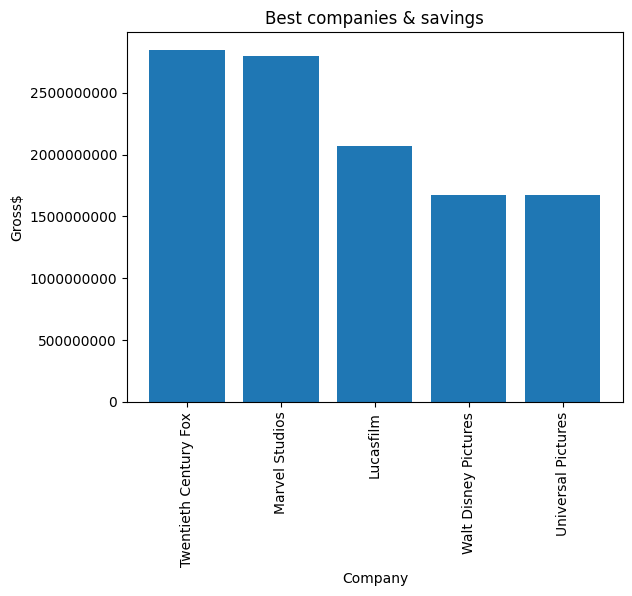

In [ ]:
companies = max_budget['company']
budgets = max_budget['gross']

plt.bar(companies, budgets)

plt.xlabel('Company')
plt.ylabel('Gross$')
plt.title('Best companies & savings')
plt.xticks(rotation=90)

plt.ticklabel_format(style='plain', axis='y')


plt.show()

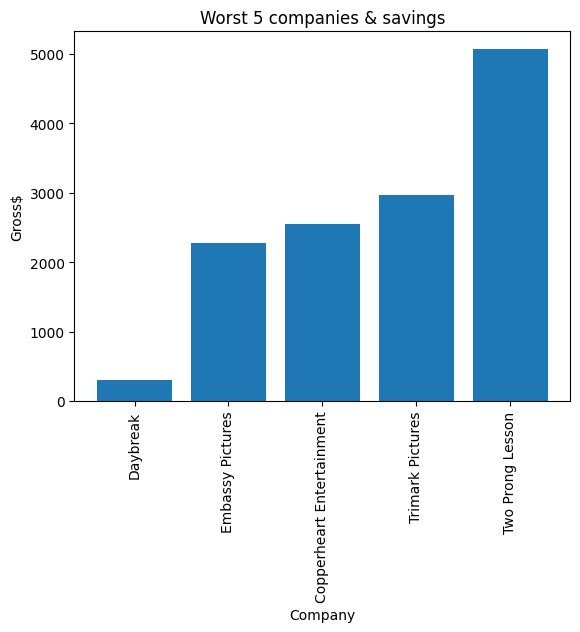

In [ ]:
companies = min_budget['company']
budgets = min_budget['gross']

plt.bar(companies, budgets)


plt.xlabel('Company')
plt.ylabel('Gross$')
plt.title('Worst 5 companies & savings')
plt.xticks(rotation=90)

plt.ticklabel_format(style='plain', axis='y')


plt.show()

In [ ]:
le = LabelEncoder()
df['director_encoded'] = le.fit_transform(df['director'])
df['company_encoded'] = le.fit_transform(df['company'])

<ipython-input-153-dd45d5aa2a60>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr(method="pearson")


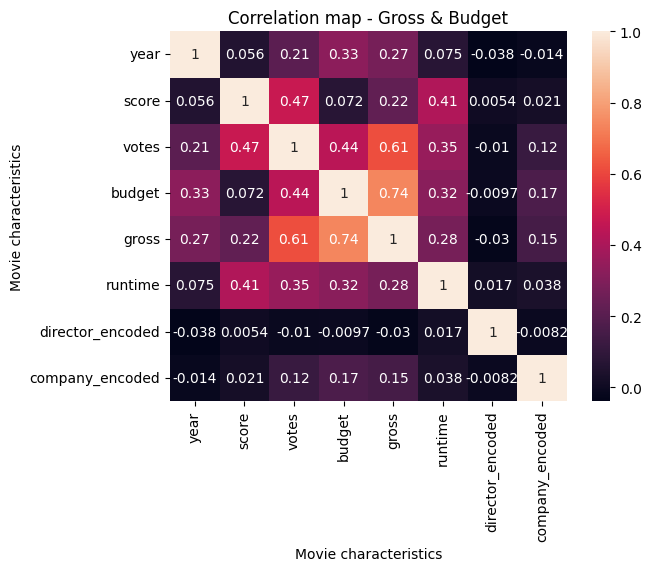

In [ ]:
correlation = df.corr(method="pearson")
sns.heatmap(correlation,annot=True)
plt.title('Correlation map - Gross & Budget')
plt.xlabel('Movie characteristics')
plt.ylabel('Movie characteristics')
plt.show()

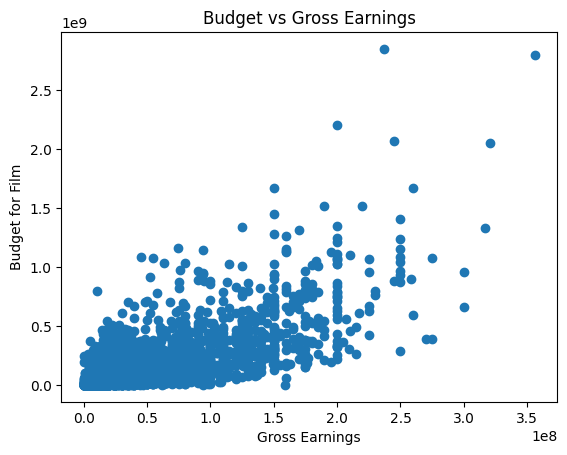

In [ ]:
plt. scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

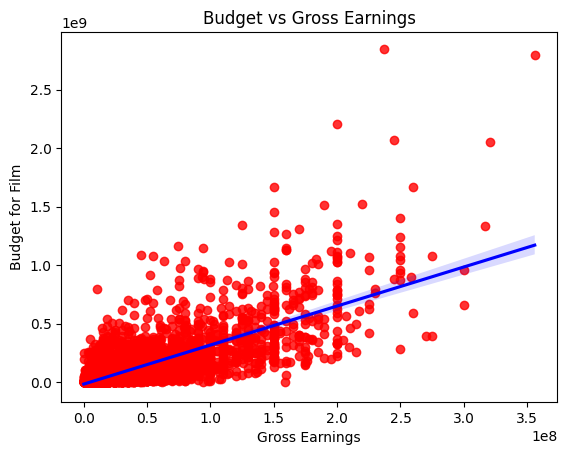

In [ ]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

Text(0, 0.5, 'Budget for film')

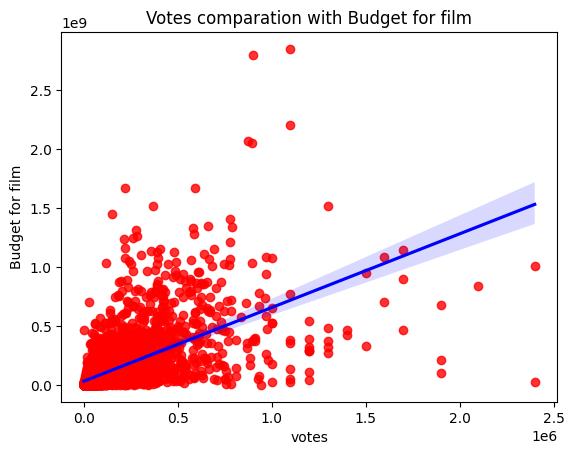

In [ ]:
sns.regplot(x='votes', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title('Votes comparation with Budget for film')
plt.xlabel('votes')
plt.ylabel('Budget for film')

As we can see, there is no direct correlation between the director and profits, nor is there a strong correlation between the production company and profits. However, there is a correlation between budget and earnings.

This can be interpreted to mean that for this company, having a massive budget to spend is not the ultimate solution. The key lies in finding a talented director with innovative ideas who has a sufficient budget to carry out the required work. To emphasize this point further, it would be best to seek out stories with a profound background, key and trending ideas, an excellent director, and the budget necessary for all required visual effects. These three combinations are what make a movie successful.